# Section 2 - Unsupervised Learning

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") # to ignore long warning messages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Load the data

In [ ]:
# Load data with pandas
dataset = pd.read_csv('data\ML_train_dataset.csv')

In [ ]:
# Separate dataset features (genomic features, descriptors, morgan fingerprints) and label
y_label = dataset['Y']
dataset = dataset.drop('Y', axis=1)

print(y_label.shape)
print(dataset.shape)
dataset.head()

(18442,)
(18442, 10333)


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1003_drug2,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2
0,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

PCA and t-SNE were used to reduce dimensionality. Initially, the number of components needed to explain 90% of the variance in the data was calculated. But why 90 per cent? As this is a problem associated with Drug Synergy, i.e. health-related, it is essential to ensure that most of the variance in the data is preserved in order to maintain the integrity and accuracy of the information. This is crucial to ensure that the analyses and conclusions derived from the data are reliable and can be used to make informed decisions in health contexts.

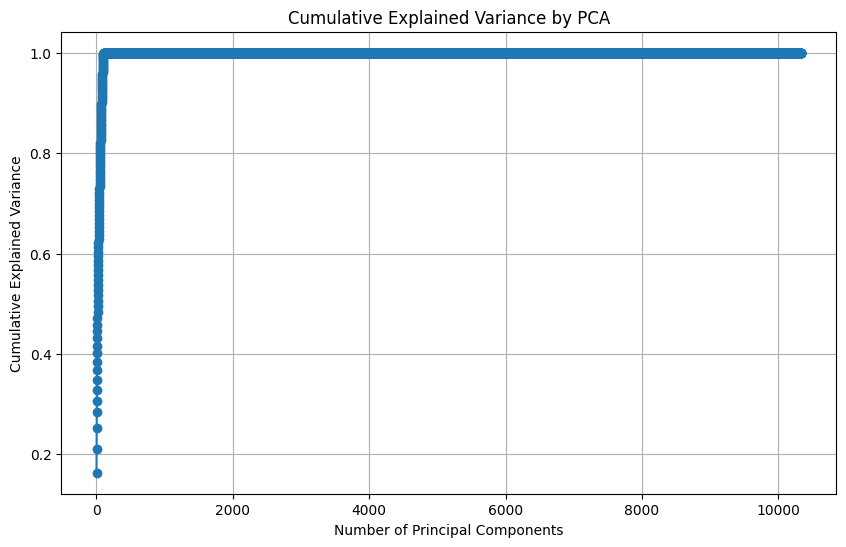

Number of principal components needed to explain 90% of the variance: 75


In [6]:
# PCA
pca = PCA().fit(dataset)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid()
plt.show()

# Determine the number of components needed to explain 90% of the variance
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum(), 1) if cumulative_variance >= 0.90)
print(f'Number of principal components needed to explain 90% of the variance: {n_components}')

# Apply PCA with the required number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(dataset)

A large number of components (75) is required to explain 90% of the variance, which suggests that the data is very complex and doesn't compress easily into fewer dimensions.

In [9]:
# Apply PCA with 75 principal components
pca = PCA(n_components=75, random_state=42)
x_pca = pca.fit(dataset)

# Determine the cumulative explained variance
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Explained variance: %s' % str(pca.explained_variance_ratio_))
print(f'Sum: {sum(pca.explained_variance_ratio_) * 100} %')

Explained variance: [0.16330789 0.04803627 0.04171262 0.03159917 0.02202947 0.0217866
 0.01960041 0.01918244 0.01716012 0.01694544 0.01513471 0.01489863
 0.0137555  0.01306144 0.01250326 0.01239366 0.01203994 0.01098089
 0.0107147  0.01037081 0.01027687 0.01011753 0.01001448 0.00958564
 0.00937763 0.00931233 0.00901019 0.00877124 0.00863642 0.00859219
 0.00849849 0.00833472 0.00800556 0.00800351 0.00785671 0.00777463
 0.00769042 0.00751507 0.00745708 0.00738517 0.00730871 0.00705391
 0.00695378 0.00691476 0.00674027 0.00669725 0.00667805 0.00657353
 0.00644842 0.00633764 0.00625744 0.00619356 0.00613189 0.00601783
 0.00594731 0.00589149 0.00580015 0.00570494 0.00566708 0.00563149
 0.00557151 0.00556087 0.00541942 0.00537781 0.00517798 0.00513269
 0.00510313 0.00506425 0.00501682 0.00491081 0.00485851 0.00481092
 0.00473435 0.00469154 0.00465052]
Sum: 90.24604920875622 %


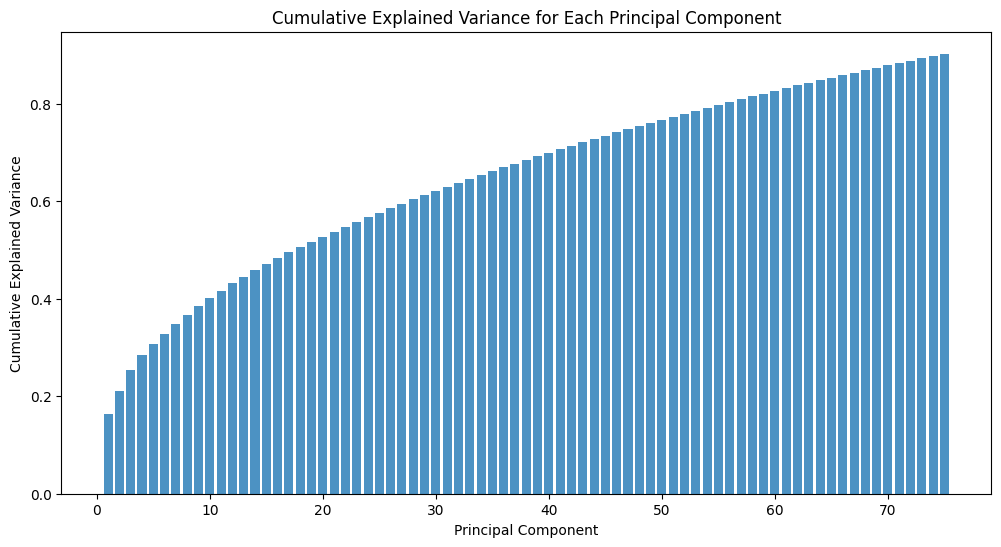

In [10]:
# Bar chart for the principal components
components = np.arange(1, 76)
plt.figure(figsize=(12, 6))
plt.bar(components, cumulative_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Each Principal Component')
plt.show()

## t-SNE

t-Distributed Stochastic Neighbour Embedding (t-SNE) is a dimensionality reduction technique that is particularly useful for visualising high-dimensional data. It preserves local structure, contributes to better visualisation and is highly robust to noise. These characteristics contribute to reducing the dimensionality of the data studied as well as its visualisation.

To make it easier to visualise these groupings, an operation was carried out to classify the data according to the value of Y. 

Y values were categorised as follows:

Y values between -infinite and 0 were categorised as -1.

Y values between 0 and 30 were categorised as 0.

Y values between 30 and +infinite were categorised as 1.

In [11]:
# Create the column 'Y_categories' using the apply function and a lambda function
dataset['Y_categories'] = y_label.apply(lambda y: 0 if 0 <= y < 30 else (1 if y >= 30 else -1))

# Check the result
dataset['Y_categories']

0        0
1        0
2       -1
3       -1
4        0
        ..
18437    0
18438    0
18439    0
18440    0
18441    0
Name: Y_categories, Length: 18442, dtype: int64

In [12]:
# t-SNE

# Create TSNE object
tsne_obj = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit TSNE
tsne_obj.fit(dataset)

TSNE(perplexity=30, random_state=42)

<Axes: >

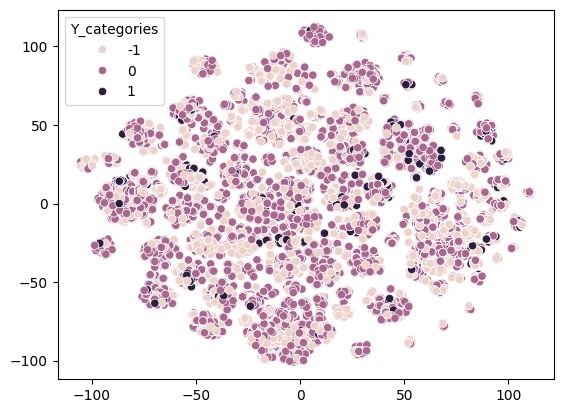

In [13]:
# Plot TSNE
sns.scatterplot(x=tsne_obj.embedding_[:, 0], y=tsne_obj.embedding_[:, 1], hue=dataset['Y_categories'])

The t-SNE (t-Distributed Stochastic Neighbour Embedding) graph generated is a two-dimensional visualisation of the drug synergy data. Each dot on the graph represents a drug combination. The proximity between the dots indicates that these drug combinations have similar characteristics in high-dimensional space. Areas where the dots are more densely clustered suggest regions of high similarity, while more dispersed areas may indicate greater variability or outliers. t-SNE is designed to preserve the local structure of the data, making it easier to identify local patterns and relationships.

Analyzing the t-SNE we can't make conclusions about relevant clusters of data, since the three categories overlap too much.

## K-Means

Initially, the Elbow Method was applied in order to define the ideal number of clusters to be used.

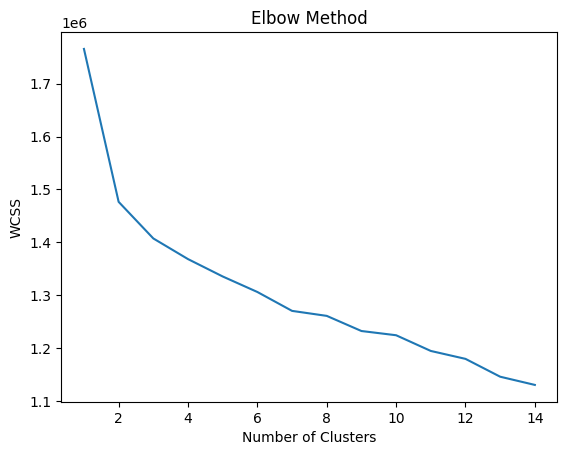

In [14]:
sampled_data = dataset.sample(n=200, random_state=42)

# Initialize the WCSS list
wcss = list()

# Calculate the WCSS for different numbers of clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sampled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

After analysing the graph above, we can see that the ideal number of clusters for this type of data is 2.

## Hierarquical Clustering

Hierarchical clustering helps identify the natural grouping within data by progressively merging similar points and visualizing this process in a dendrogram. This method does not require a predefined number of clusters (like k-means does), and it allows for more flexible and interpretable clustering.

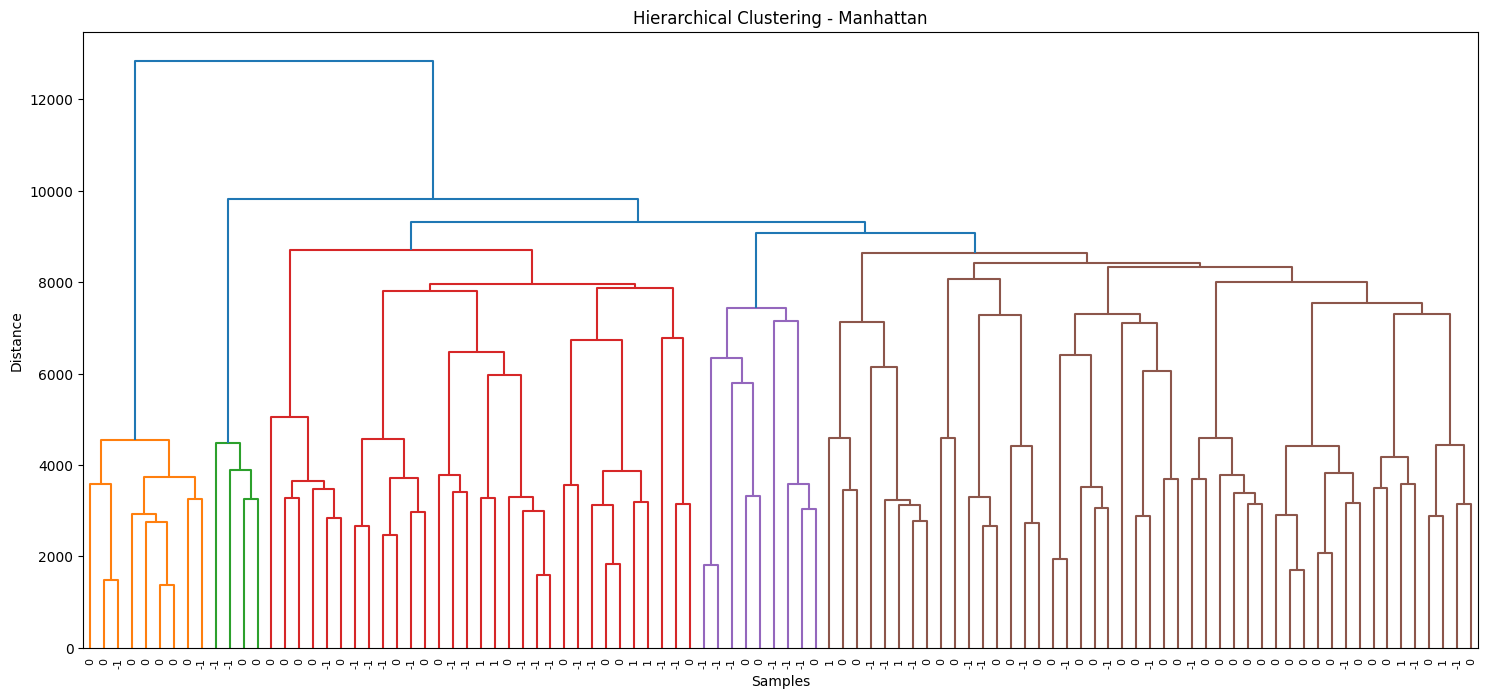

In [15]:
sampled_data = dataset.sample(n=100, random_state=42)

# Hierarchical clustering with Manhattan distance
Z = linkage(sampled_data, method='complete', metric='cityblock')

# Dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z,
           labels=sampled_data['Y_categories'].values,
           orientation='top',
           leaf_font_size=8)

# Color map
data_colors = {-1:"red", 0: 'blue', 1: 'green'}
ax = plt.gca()

plt.title('Hierarchical Clustering - Manhattan')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Analyzing the dendrogram above, we can't draw conclusions about relevant clusters, since the clusters computed by the hierarquical clustering contain a mix of all categories (-1, 0, 1).